# The One Dimensional Heat Equation

In [1]:
from sympy import *
from sympy.utilities.lambdify import lambdify
init_printing()

## The one dimensional heat conduction

If $u(x,t)$ is the temperature at position $x$ and time t the one dimensional heat equation is given by:


In [2]:
x = Symbol('x')
t = Symbol('t')
u = Function('u')(x,t)
heat = Eq(u.diff(t),u.diff(x,x))
pprint(heat)

                2         
∂              ∂          
──(u(x, t)) = ───(u(x, t))
∂t              2         
              ∂x          


In the lectures, we have found the particular solution

In [3]:
k = Symbol('k')
u_part = exp(-(k*pi)**2*t)*sin(k*pi*x)
pprint(u_part)

   2  2             
 -π ⋅k ⋅t           
ℯ        ⋅sin(π⋅k⋅x)


if $k$ is an integar,

In [4]:
u_part = u_part.subs(k,1)
pprint(u_part)

   2           
 -π ⋅t         
ℯ     ⋅sin(π⋅x)


we can see that u_part satifies the heat equation

In [5]:
heat = heat.subs(u,u_part)
pprint(heat.doit())

True


and the following boundary conditions:

In [6]:
u_0 = u_part.subs(x,0)
u_1 = u_part.subs(x,1)
print("u_0 = " + pretty(u_0))
print("u_1 = " + pretty(u_1))

u_0 = 0
u_1 = 0


and initial conditions:

In [7]:
u_init = u_part.subs(t,0)
print("u_init = " + pretty(u_init))

u_init = sin(π⋅x)


And here's a 3D-plot of the solution

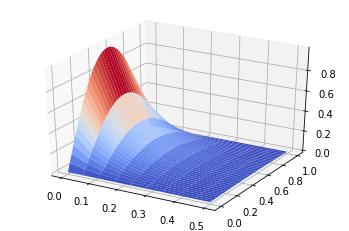

<Figure size 432x288 with 0 Axes>

In [8]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

lam_u_part = lambdify((x,t), u_part)
Nx = 40
Nt = 10
xa = np.linspace(0,1,Nx) 
ta = np.linspace(0,0.5,Nt)
X, T = np.meshgrid(xa, ta)
Q = np.asarray([[lam_u_part(Xe,Te) for (Xe, Te) in zip(Xrow,Trow)] for (Xrow,Trow) in zip(X,T)])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(T, X, Q, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
fig = plt.figure()

## Numerical solution

Now, we will use the explicite time stepping scheme derived in the lectures to approximately
compute a solution.

First, we define the number of unknowns, the mesh size, and the size and number of the time
steps:

In [9]:
n = 40; h = 1./n
tau = 1./3200; steps = 400
v = np.zeros((n+1,steps+1))

Then, we initialize our numerical solution:

In [10]:
lam_u_init = lambdify(x,u_init)
for j in range(1,n):
    v[j,0] = lam_u_init(j*h)

and set the boundary conditions:

In [11]:
for m in range(0,steps+1):
    v[0,m] = 0
    v[n,m] = 0

To compute the numerical solution, we can then use the loop

In [12]:
for j in range(1,n):
    v[j,1] = v[j,0] + (tau/(h**2)) * ( v[j-1,0] - 2*v[j,0] + v[j+1,0] )

We may take a little time to plot the results:

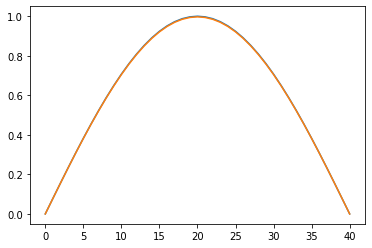

In [13]:
plt.figure()
plt.plot(v[:,0])
plt.plot(v[:,1])
plt.show()

To compute the solution for all time steps, we use the following loop:

In [14]:
for m in range(0,steps):
    for j in range(1,n):
        v[j,m+1] = v[j,m] + tau/h**2 * ( v[j-1,m] - 2*v[j,m] + v[j+1,m] )

And plot the results again:

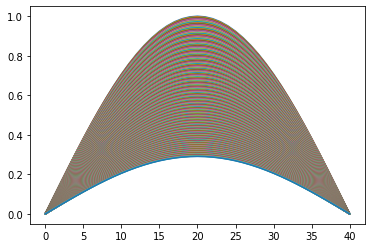

In [15]:
plt.figure()
for m in range(0,steps+1):
    plt.plot(v[:,m])
plt.show()

Of course, we would like to compare the numerical solution with the anayltic one. The following
plot shows, that we can come pretty close ...

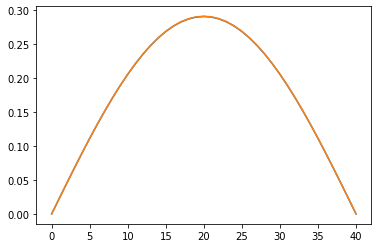

In [16]:
exact_plot = [lam_u_part(j*h,steps*tau) for j in range(0,n+1)]
plt.figure()
plt.plot(v[:,steps])
plt.plot(exact_plot)
plt.show()